In [1]:
#import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the dataset
data=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
print(data.shape)

(5572, 5)


In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#removing unnamed columns i.e data cleansing
data = data.drop(columns='Unnamed: 2')
data = data.drop(columns='Unnamed: 3')
data = data.drop(columns='Unnamed: 4')

In [7]:
print(data.shape)

(5572, 2)


In [9]:
#renaming the columns accordingly
data = data.rename(columns = {'v1':'label','v2':'message'})

In [11]:
#CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text
from sklearn import feature_extraction
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["message"])

In [12]:
#Setting spam as 1 and ham as 0
data["label"]=data["label"].map({'spam':1,'ham':0})
y = data['label']

In [26]:
#Splitting the dataset into testing and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Naive Bayes Classifier 

In [27]:
#Creating a Naive Bayes Classifier model
from sklearn import naive_bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
#Testing the model
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [29]:
#Confusion Matrix for Naive Bayes Classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[1421   18]
 [  11  222]]


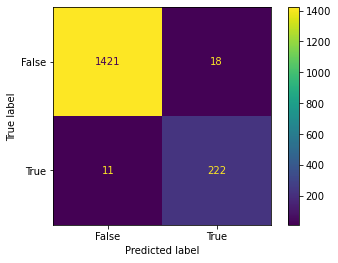

In [30]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [31]:
#Accuracy of Naive Bayes Classifier model
print("Accuracy of Naive Bayes classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes classifier: 0.9826555023923444


In [32]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9701405064914537


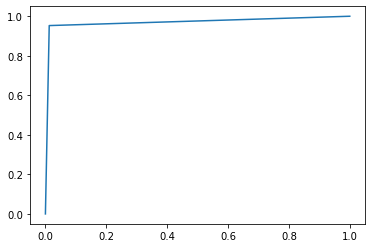

In [33]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

In [34]:
#Printing the classification report of Naive Bayes classifier model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1439
           1       0.93      0.95      0.94       233

    accuracy                           0.98      1672
   macro avg       0.96      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## Support Vector Machine Classifier

In [35]:
#Creating a SVC model
from sklearn.svm import SVC
svc_model = SVC() #initialize the code module
svc_model.fit(X_train,y_train)

SVC()

In [36]:
#Testing the model
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 1]


In [37]:
#Confusion Matrix for Support Vector Machine classifier
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[1439    0]
 [  39  194]]


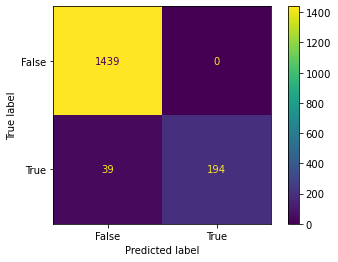

In [38]:
#Displaying the Confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [39]:
#Accuracy of SVC
print("Accuracy of SVM model:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of SVM model: 0.9766746411483254


In [40]:
#ROC curve for SVC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9163090128755365


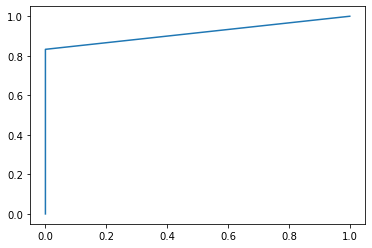

In [41]:
plt.plot(false_positive_rate,true_positive_rate)

In [42]:
#Printing the classification report of SVM classifier model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1439
           1       1.00      0.83      0.91       233

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

